<a href="https://colab.research.google.com/github/dabster108/Dataanalysis_numpy/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
df = pd.read_csv('/content/sample_data/medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
df['overweight'] = None
df['overweight'] = df['weight' ]/ ((df['height'] / 100) ** 2)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [9]:
# def check_overweight(row):
#     if row['overweight'] > 25:
#         return 1
#     else:
#         return 0

# df['is_overweight'] = df.apply(check_overweight, axis=1)
df.head()

df['overweight'] = df['overweight'].apply(lambda x: 1 if x > 25 else 0)

# Display the updated dataframe
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [10]:
df['cholesterol'] = df['cholesterol'].apply(lambda x :1 if x > 1 else 0)
df['gluc'] = df['gluc'].apply(lambda x :1 if x > 1 else 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


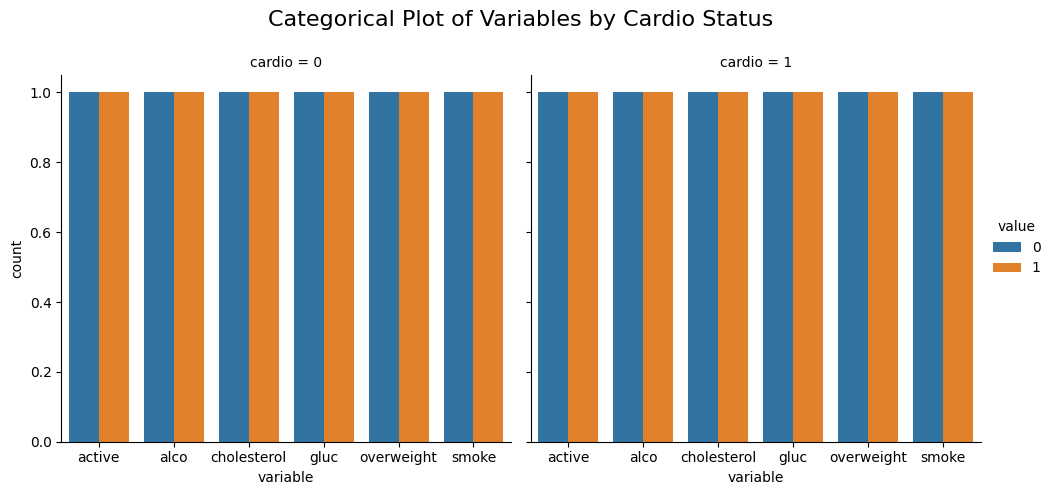

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def draw_cat_plot(df):
    # Step 1: Melt the dataframe to long format
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Step 2: Create a new column to count occurrences
    df_cat["total"] = 1

    # Step 3: Group by cardio, variable, and value, and count occurrences
    df_cat = df_cat.groupby(["cardio", "variable", "value"], as_index=False).count()

    # Step 4: Create the categorical plot using seaborn
    g = sns.catplot(data=df_cat, x="variable", hue="value", col="cardio", kind="count")

    # Customizing the plot
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle("Categorical Plot of Variables by Cardio Status", fontsize=16)

    # Step 5: Show the plot
    plt.show()
    #fig.savefig('catplot.png')

# Assuming 'df' is your dataframe, you can call the function like so:
draw_cat_plot(df)


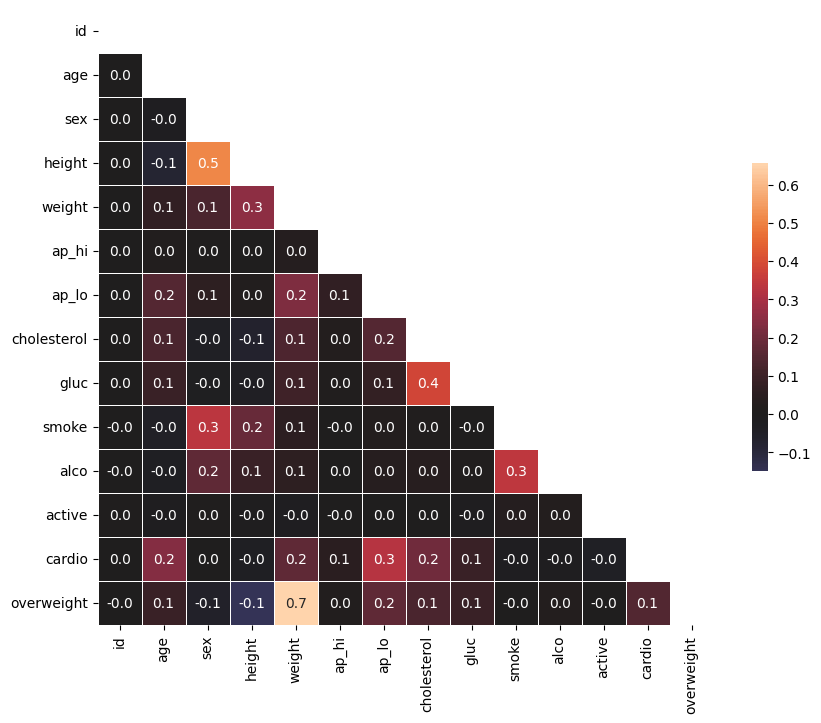

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def draw_heat_map():
    # Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Draw the heatmap
    sns.heatmap(corr,
                mask=mask,
                annot=True,
                fmt='.1f',
                center=0,
                square=True,
                linewidths=.5,
                cbar_kws={"shrink": .5})

    # Show plot
    plt.show()

# Example call (make sure 'df' is already defined)
draw_heat_map()


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [25]:
df = pd.read_csv('/content/sample_data/fcc-forum-pageviews.csv', index_col= "date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [28]:
df = df[(df["value"] > df["value"].quantile(0.025)) & (df["value"] < df["value"].quantile(0.975))]
df.head()

,value
date,
2016-06-17,21691
2016-06-18,21681
2016-06-20,28508
2016-06-21,26805
2016-06-25,21923


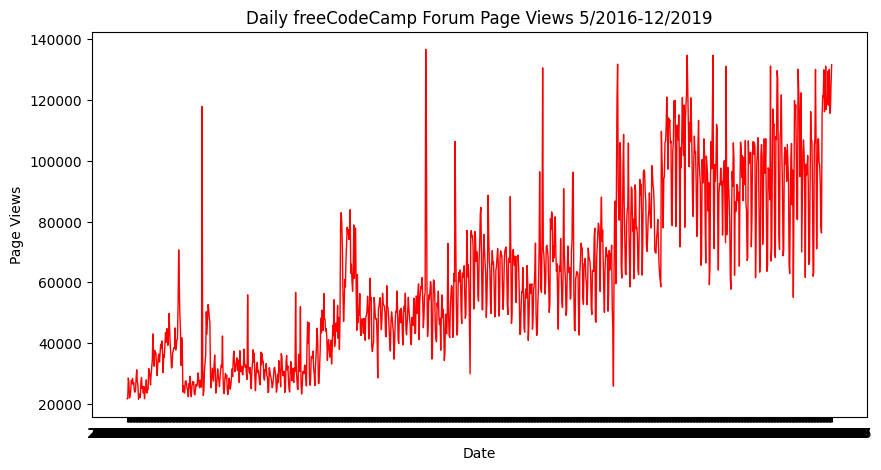

In [34]:
import matplotlib.pyplot as plt

def draw_line_plot():
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df.index, df["value"], 'r', linewidth=1)

    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

    plt.show()

draw_line_plot()


<ipython-input-41-8e5b1eeace9d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df.index.month
<ipython-input-41-8e5b1eeace9d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df.index.year


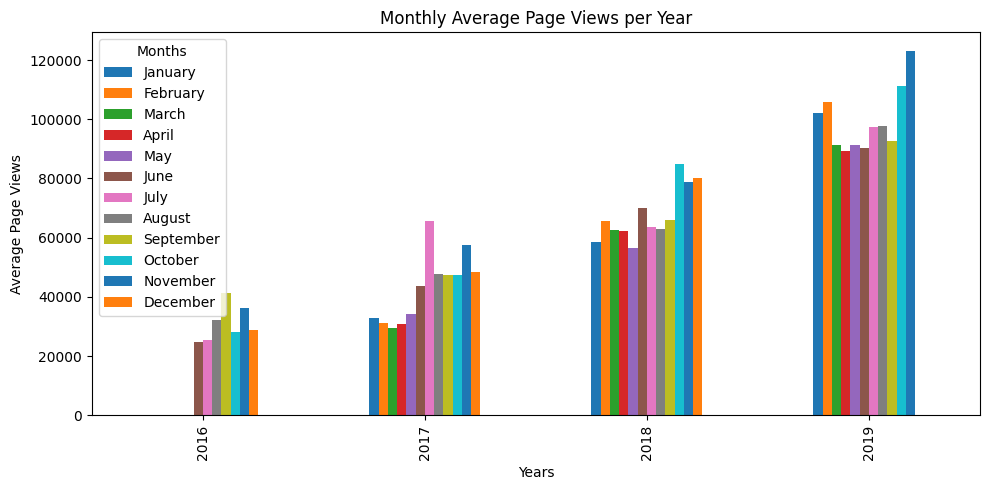

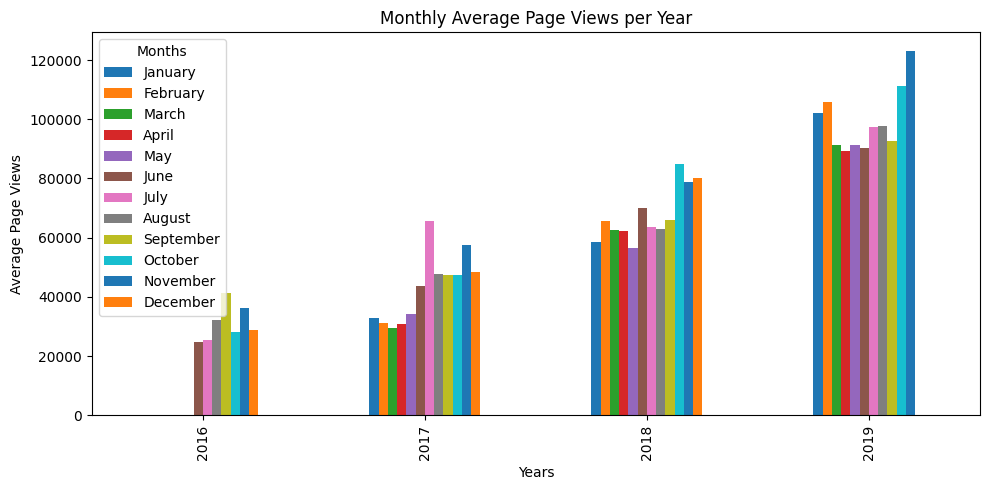

In [41]:
import matplotlib.pyplot as plt

def draw_bar_plot(df):
    # Ensure the index is datetime
    df.index = pd.to_datetime(df.index)

    # Add 'month' and 'year' columns
    df["month"] = df.index.month
    df["year"] = df.index.year

    # Group data and calculate mean
    df_bar = df.groupby(["year", "month"])["value"].mean().unstack()

    # Create bar plot
    fig = df_bar.plot(kind="bar", figsize=(10, 5)).figure

    # Set legend, labels, and title
    month_names = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    plt.legend(month_names, title='Months')
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.title("Monthly Average Page Views per Year")
    plt.tight_layout()

    return fig

# Assuming you have the original DataFrame 'df' defined somewhere
draw_bar_plot(df)  # Call with the original DataFrame
